In [ ]:
#! pip install split_folders

In [ ]:
import os
import shutil
#import splitfolders
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("float32")
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,BatchNormalization,Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, load_model, Sequential
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
import itertools
import matplotlib.pyplot as plt
import datetime
import matplotlib.image as mping
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir="/content/drive/MyDrive/AutismDataset/train"
test_dir="/content/drive/MyDrive/AutismDataset/test"
val_dir="/content/drive/MyDrive/AutismDataset/valid"
train_data=image_dataset_from_directory(train_dir,batch_size=64,image_size=(224,224),label_mode='categorical',shuffle=True,seed=42)
test_data=image_dataset_from_directory(test_dir,batch_size=64,image_size=(224,224),label_mode='categorical',shuffle=False,seed=42)
val_data=image_dataset_from_directory(val_dir,batch_size=64,image_size=(224,224),label_mode='categorical',shuffle=False,seed=42)

Found 2540 files belonging to 2 classes.
Found 300 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [ ]:
class_names=train_data.class_names
class_count=len(class_names)
print(class_count)

2


In [ ]:
samples = []
x = 0
for i in tqdm(train_data.unbatch()):
    if (x == 10):
        break
    samples.append([i[0], i[1]])
    x += 1

0it [00:00, ?it/s]

In [ ]:
images = []
labels = []
for i in samples:
    images.append(i[0])
    labels.append(class_names[tf.argmax(i[1])])
len(images), len(labels)

(10, 10)

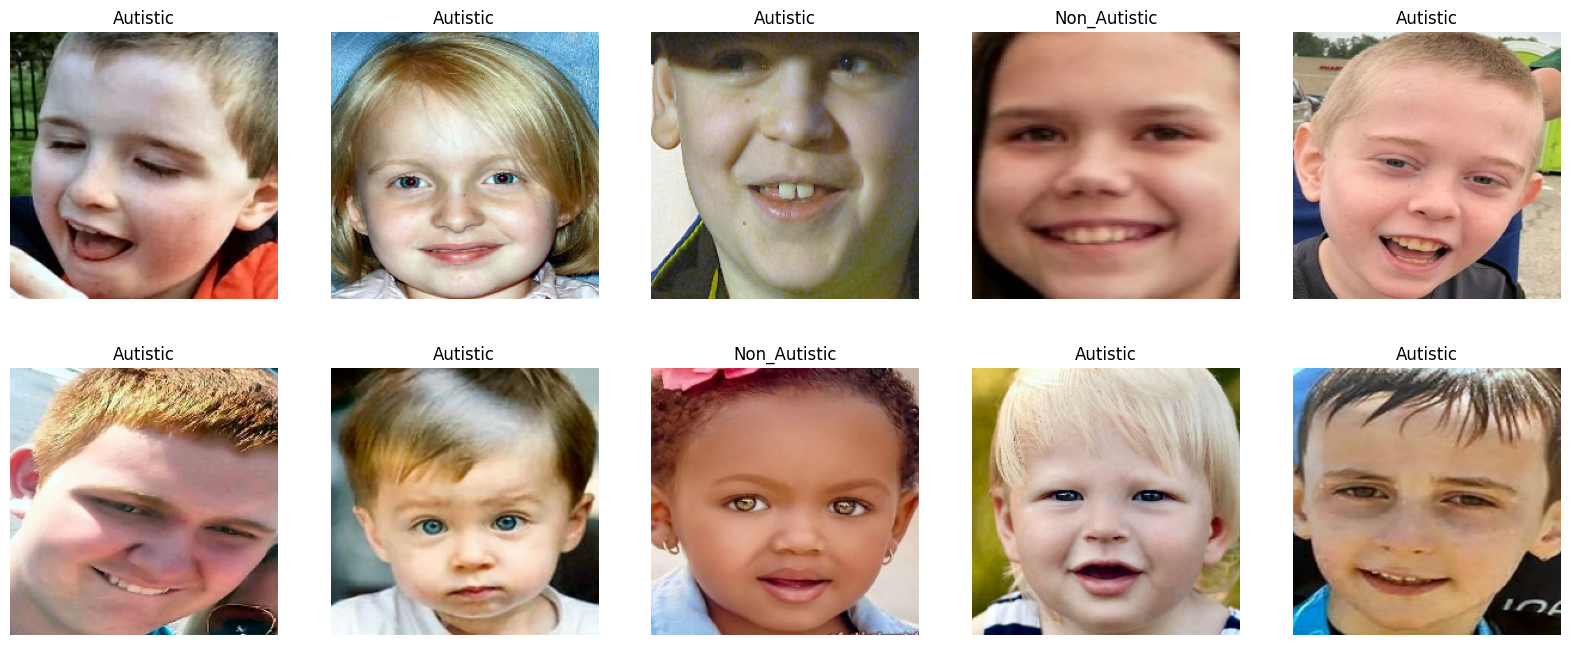

In [ ]:
fig = plt.figure(figsize=(20, 8))
rows = 2
cols = 5
x = 1
for image, label in zip(images, labels):
    fig.add_subplot(rows, cols, x)
    plt.imshow(image/255.)
    plt.axis("off")
    plt.title(label)
    x += 1

In [ ]:
print(train_data)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>


In [ ]:
input_shape = (224, 224, 3)

In [ ]:
model_name = 'EfficientNetB2'
base_model = tf.keras.applications.EfficientNetB2(
    include_top=False, weights="imagenet", input_shape=(224, 224, 3), pooling='max')

31790344/31790344 [==============================] - 0s 0us/step


In [ ]:
x = base_model.output
x = Flatten()(x)
x = tf.keras.layers.BatchNormalization(axis=-1, momentum=0.9)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.5, seed=42)(x)
output = Dense(2, activation='sigmoid')(x)

model=Model(inputs=base_model.input, outputs=output)
model.compile(tf.keras.optimizers.Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_data,epochs=50,validation_data=val_data)


Epoch 1/50
40/40 [==============================] - 389s 8s/step - loss: 0.6633 - accuracy: 0.7201 - val_loss: 0.6744 - val_accuracy: 0.6500
Epoch 2/50
40/40 [==============================] - 33s 764ms/step - loss: 0.2912 - accuracy: 0.8949 - val_loss: 0.4320 - val_accuracy: 0.8000
Epoch 3/50
40/40 [==============================] - 32s 760ms/step - loss: 0.1279 - accuracy: 0.9575 - val_loss: 0.6539 - val_accuracy: 0.7600
Epoch 4/50
40/40 [==============================] - 32s 760ms/step - loss: 0.0630 - accuracy: 0.9827 - val_loss: 0.6182 - val_accuracy: 0.7700
Epoch 5/50
40/40 [==============================] - 32s 760ms/step - loss: 0.0443 - accuracy: 0.9870 - val_loss: 0.6861 - val_accuracy: 0.8100
Epoch 6/50
40/40 [==============================] - 33s 767ms/step - loss: 0.0277 - accuracy: 0.9917 - val_loss: 0.6201 - val_accuracy: 0.8400
Epoch 7/50
40/40 [==============================] - 32s 762ms/step - loss: 0.0186 - accuracy: 0.9949 - val_loss: 0.6595 - val_accuracy: 0.8200
E

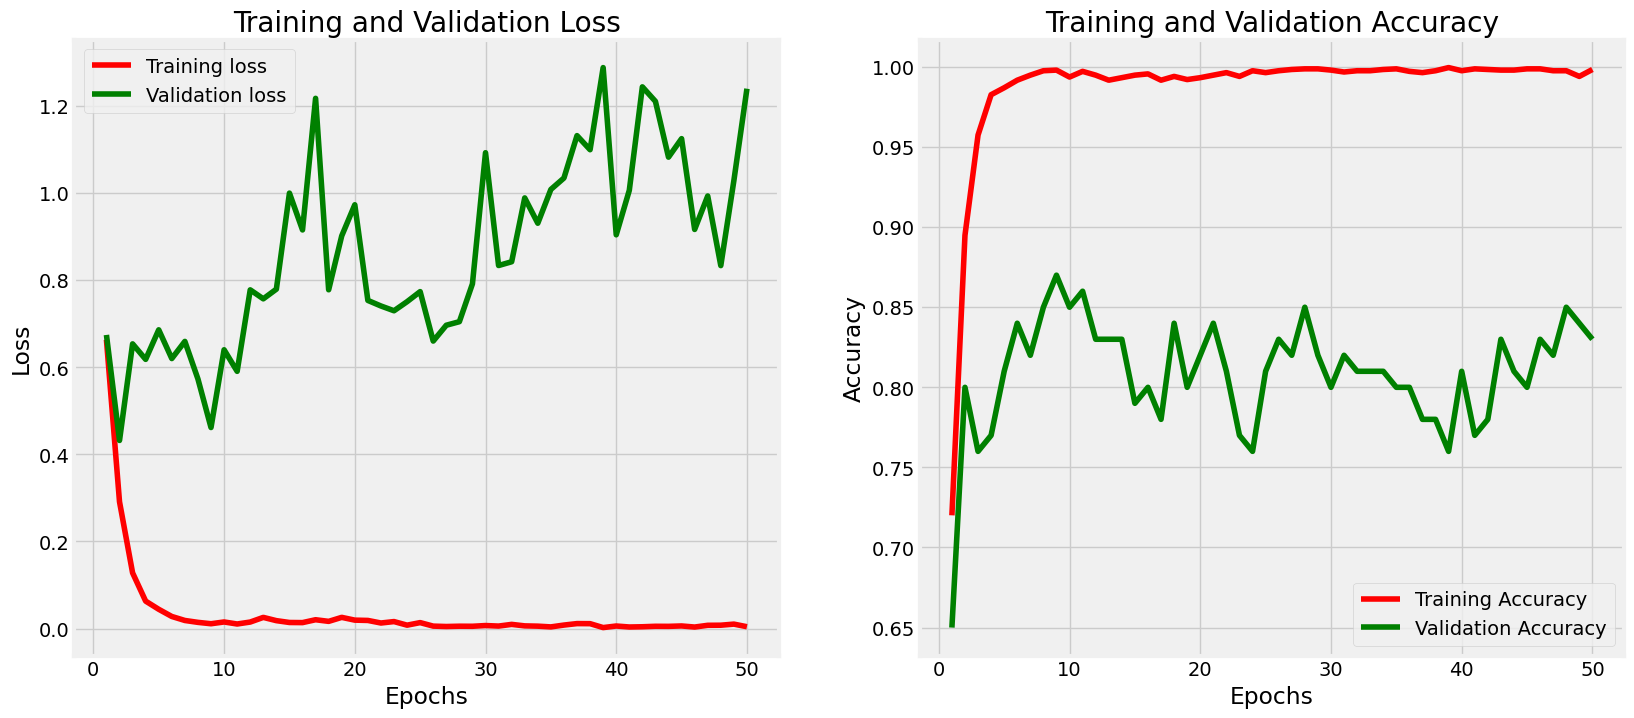

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
#index_loss = np.argmin(val_loss)
#val_lowest = val_loss[index_loss]
#index_acc = np.argmax(val_acc)
#acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
#loss_label = f'best epoch= {str(index_loss + 1)}'
#acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
#plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
#plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)
print("Test Accuracy:", test_accuracy)

5/5 [==============================] - 117s 25s/step - loss: 1.0580 - accuracy: 0.8567
Test Accuracy: 0.8566666841506958


In [ ]:
test_data_array = []
labels_array = []
for images, labels in test_data:
    test_data_array.append(images.numpy())
    labels_array.append(labels.numpy())

X_test = np.concatenate(test_data_array, axis=0)
y_test = np.concatenate(labels_array, axis=0)

In [ ]:
y_pred = model.predict(X_test)

10/10 [==============================] - 6s 234ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred = tf.keras.utils.to_categorical(y_pred, num_classes=2)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       150
           1       0.89      0.81      0.85       150

   micro avg       0.86      0.86      0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300
 samples avg       0.86      0.86      0.86       300



In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[135,  15],
       [ 28, 122]])

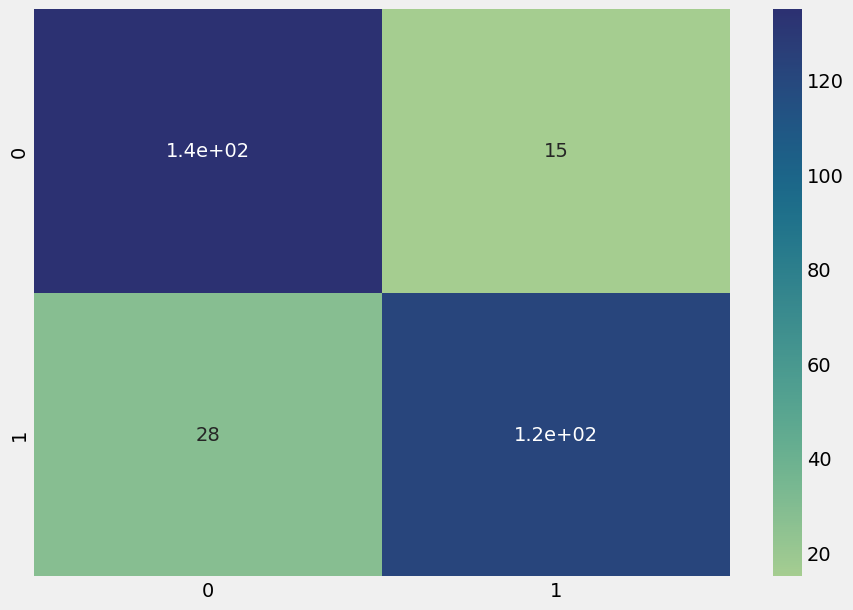

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, cmap='crest', annot=True)
plt.show()

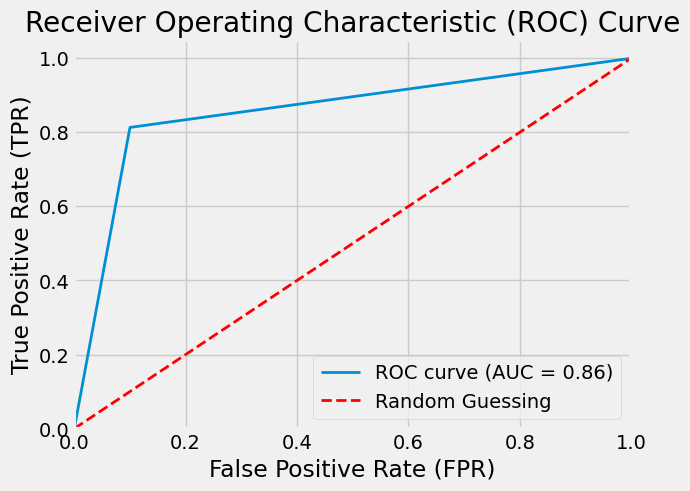

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    return roc_auc

# Example usage
# Assuming you have the true labels (y_true) and predicted probabilities or scores (y_scores) generated by your deep learning model

# Generate ROC curve
roc_auc=plot_roc_curve(y_test, y_pred)

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report_dict)

,0,1,accuracy,macro avg,weighted avg
precision,0.828221,0.890511,0.856667,0.859366,0.859366
recall,0.900000,0.813333,0.856667,0.856667,0.856667
f1-score,0.862620,0.850174,0.856667,0.856397,0.856397
support,150.000000,150.000000,0.856667,300.000000,300.000000


In [ ]:

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
NPV = TN / (TN + FN)
PPV = TP / (TP + FP)


print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)
print("Negative Predictive Value:", NPV)
print("Positive Predictive Value:", PPV)

print("AUC:", roc_curve)

True Positives: 122
True Negatives: 135
False Positives: 15
False Negatives: 28
Sensitivity (True Positive Rate): 0.8133333333333334
Specificity (True Negative Rate): 0.9
Negative Predictive Value: 0.8282208588957055
Positive Predictive Value: 0.8905109489051095
AUC: <function roc_curve at 0x79559d609c60>
